In [16]:
import pandas as pd 
from scipy.stats import chi2_contingency
from dython.nominal import associations

# Read processed data from csv files

df = pd.read_csv('../data/processed/sanitary_registry_medicines.csv')

def filter_outliers(frequencies: pd.Series, threshold: int = 1.5):
    Q1 = frequencies.quantile(0.25)
    Q3 = frequencies.quantile(0.75)

    IQR = Q3 - Q1


    # Filter the pharmaceutical forms that are outliers

 
    return frequencies[((frequencies < (Q1 - threshold * IQR)) |(frequencies > (Q3 + threshold * IQR)))]

df.head()


,product_name,manufacturer,pharmaceutical_form,expiration_date,register_year,durability
0,cardilat 50,laboratorios de aplicaciones medicas,COMPRIMIDO,2025-06-28,2000,25
1,alicon complex,laboratorios ameripharma,JARABE,2025-11-08,2000,25
2,trental,sanofi-aventis de mexico s.a. de c.v.,SOLUCION,2020-05-23,2000,20
3,tensolisin-d,acromax dominicana,TABLETA,2025-12-18,2000,25
4,biovagin,gefarca industria farmaceutica perezespinosa,CREMA,2025-12-18,2000,25


In [17]:
# Obtain the relevant pharmaceutical forms in the sanitary registry 

frequencies = df['pharmaceutical_form'].value_counts()

# Filter the pharmaceutical forms that are outliers
pharmaceutical_forms = filter_outliers(frequencies,1.5)


# Filter the dataframe to only contain the relevant pharmaceutical forms
df = df[df['pharmaceutical_form'].isin(pharmaceutical_forms.index)]


print('-'*50)
print(pharmaceutical_forms.describe())


--------------------------------------------------
count      12.000000
mean     1099.083333
std      1132.556678
min        77.000000
25%       328.000000
50%       687.000000
75%      1318.000000
max      3520.000000
Name: count, dtype: float64


In [18]:
# Obtain the relevant manufacturers in the sanitary registry
frequencies = df['manufacturer'].value_counts()


# Filter the manufacturers that are outliers

manufacturers = filter_outliers(frequencies)


# Filter the dataframe to only contain the relevant manufacturers

df = df[df['manufacturer'].isin(manufacturers.index)]


In [19]:
# Print the statistics of the dataframe

print('-'*50)
print('Sanitary Registry Statistics')
print(df.describe())
print('-'*50)
print('Pharmaceutical Forms')
print(pharmaceutical_forms.describe())
print('-'*50)
print('Manufacturers')
print(manufacturers.describe())
print('-'*50)








--------------------------------------------------
Sanitary Registry Statistics
       register_year   durability
count    9621.000000  9621.000000
mean     2012.128677    12.838478
std         5.116773     5.692638
min      2000.000000   -80.000000
25%      2009.000000    10.000000
50%      2014.000000    10.000000
75%      2016.000000    15.000000
max      2019.000000    28.000000
--------------------------------------------------
Pharmaceutical Forms
count      12.000000
mean     1099.083333
std      1132.556678
min        77.000000
25%       328.000000
50%       687.000000
75%      1318.000000
max      3520.000000
Name: count, dtype: float64
--------------------------------------------------
Manufacturers
count    248.000000
mean      38.794355
std       75.531116
min        9.000000
25%       11.000000
50%       17.000000
75%       28.000000
max      570.000000
Name: count, dtype: float64
--------------------------------------------------


Chi-square test for independence between manufacturer and pharmaceutical form
Chi-square:  15797.53418162467
p-value:  0.0
Degrees of freedom:  2717


c:\Users\Carlos Olivo\AppData\Local\Programs\Python\Python311\Lib\site-packages\dython\nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
c:\Users\Carlos Olivo\AppData\Local\Programs\Python\Python311\Lib\site-packages\dython\nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


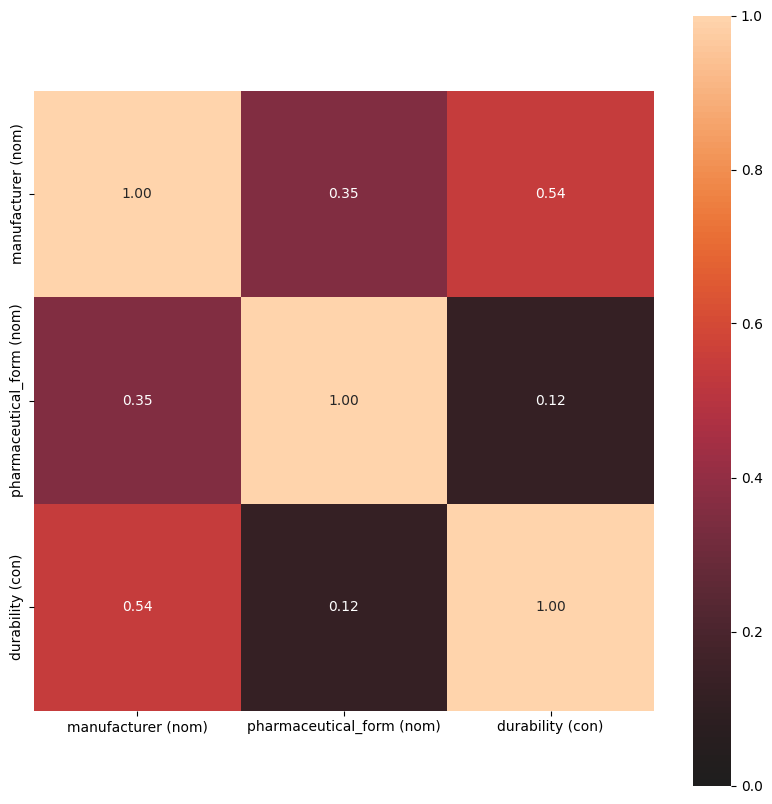

In [20]:
# Association analysis between the pharmaceutical forms and the manufacturers and durability of the medicines

df_main_features = df[['manufacturer', 'pharmaceutical_form', 'durability']]

# Determine the relationship and correlation between variables using the Chi-square test for independence and the Cramer's V statistic


# Chi-square test for independence

# H0: There is no relationship between the variables

# H1: There is a relationship between the variables

# p-value < 0.05: reject H0

# p-value > 0.05: fail to reject H0

# p-value = 0.05: marginal

# Chi-square test for independence between manufacturer and pharmaceutical form
# Save the processed data to a csv file


contingency_table = pd.crosstab(df_main_features['manufacturer'], df_main_features['pharmaceutical_form'])

chi2, p, dof, expected = chi2_contingency(contingency_table.values)

print('Chi-square test for independence between manufacturer and pharmaceutical form')

print('Chi-square: ', chi2)

print('p-value: ', p)

print('Degrees of freedom: ', dof)

# Correlations 

contingency_table = associations(df_main_features, nominal_columns=['manufacturer', 'pharmaceutical_form'], figsize=(10, 10), mark_columns=True, plot=True)

In [21]:
# Save final data to a csv file

df.to_csv('../data/final/sanitary_registry_medicines.csv', index=False)
